# Čtvrtá úloha

## Načtení knihoven

In [7]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

## Vytvoření Funkcí + Listu

In [8]:
function_1 = lambda x: x**3 - 2*x**2 + 4*x - 2
function_2 = lambda x: -np.sin(2*x) + np.cos(2*x) + x
function_3 = lambda x: np.log(x**3) - 1

original_functions = [function_1, function_2, function_3]
point_list = [[], [], []]


## "Rozkmitání"

In [9]:
for i in range(1, 101):
    oscillation = lambda: random.uniform(-0.2, 0.2)
    point_list[0].append(function_1(i) + oscillation())
    point_list[1].append(function_2(i) + oscillation())
    point_list[2].append(function_3(i) + oscillation())

## Výpočet

In [10]:
x_points = np.arange(1, 101)
x_new = np.linspace(1, 100, 400)

cubic = [[], [], []]
linear = [[], [], []]
nearest = [[], [], []]

for i in range(3):
    interp_func_1 = interp1d(x_points, point_list[i], kind='cubic')
    interp_func_2 = interp1d(x_points, point_list[i], kind='linear')
    interp_func_3 = interp1d(x_points, point_list[i], kind='nearest')
    cubic[i] = interp_func_1(x_new)
    linear[i] = interp_func_2(x_new)
    nearest[i] = interp_func_3(x_new)

plt.figure(figsize=(14, 12))

functions = ['Cubic', 'Linear', 'Nearest']
interpolated_points = [cubic, linear, nearest]

<Figure size 1400x1200 with 0 Axes>

## MSE

In [11]:
def mse(true_values, interpolated_values):
    return np.mean((true_values - interpolated_values)**2)

true_values = [[], [], []]
for i in range(3):
    true_values[i] = original_functions[i](x_new)

mse_cubic = [mse(true_values[i], cubic[i]) for i in range(3)]
mse_linear = [mse(true_values[i], linear[i]) for i in range(3)]
mse_nearest = [mse(true_values[i], nearest[i]) for i in range(3)]

for i in range(3):
    print(f"Function {i+1} MSE:")
    print(f"  Cubic: {mse_cubic[i]}")
    print(f"  Linear: {mse_linear[i]}")
    print(f"  Nearest: {mse_nearest[i]}")
    print()

Function 1 MSE:
  Cubic: 0.012125462289303971
  Linear: 987.5719731906183
  Nearest: 14715464.502019484

Function 2 MSE:
  Cubic: 0.016683586013326233
  Linear: 0.11914858617452723
  Nearest: 0.41419560879978434

Function 3 MSE:
  Cubic: 0.01367523220502302
  Linear: 0.010967529570617212
  Nearest: 0.027597168880525304



## Grafy

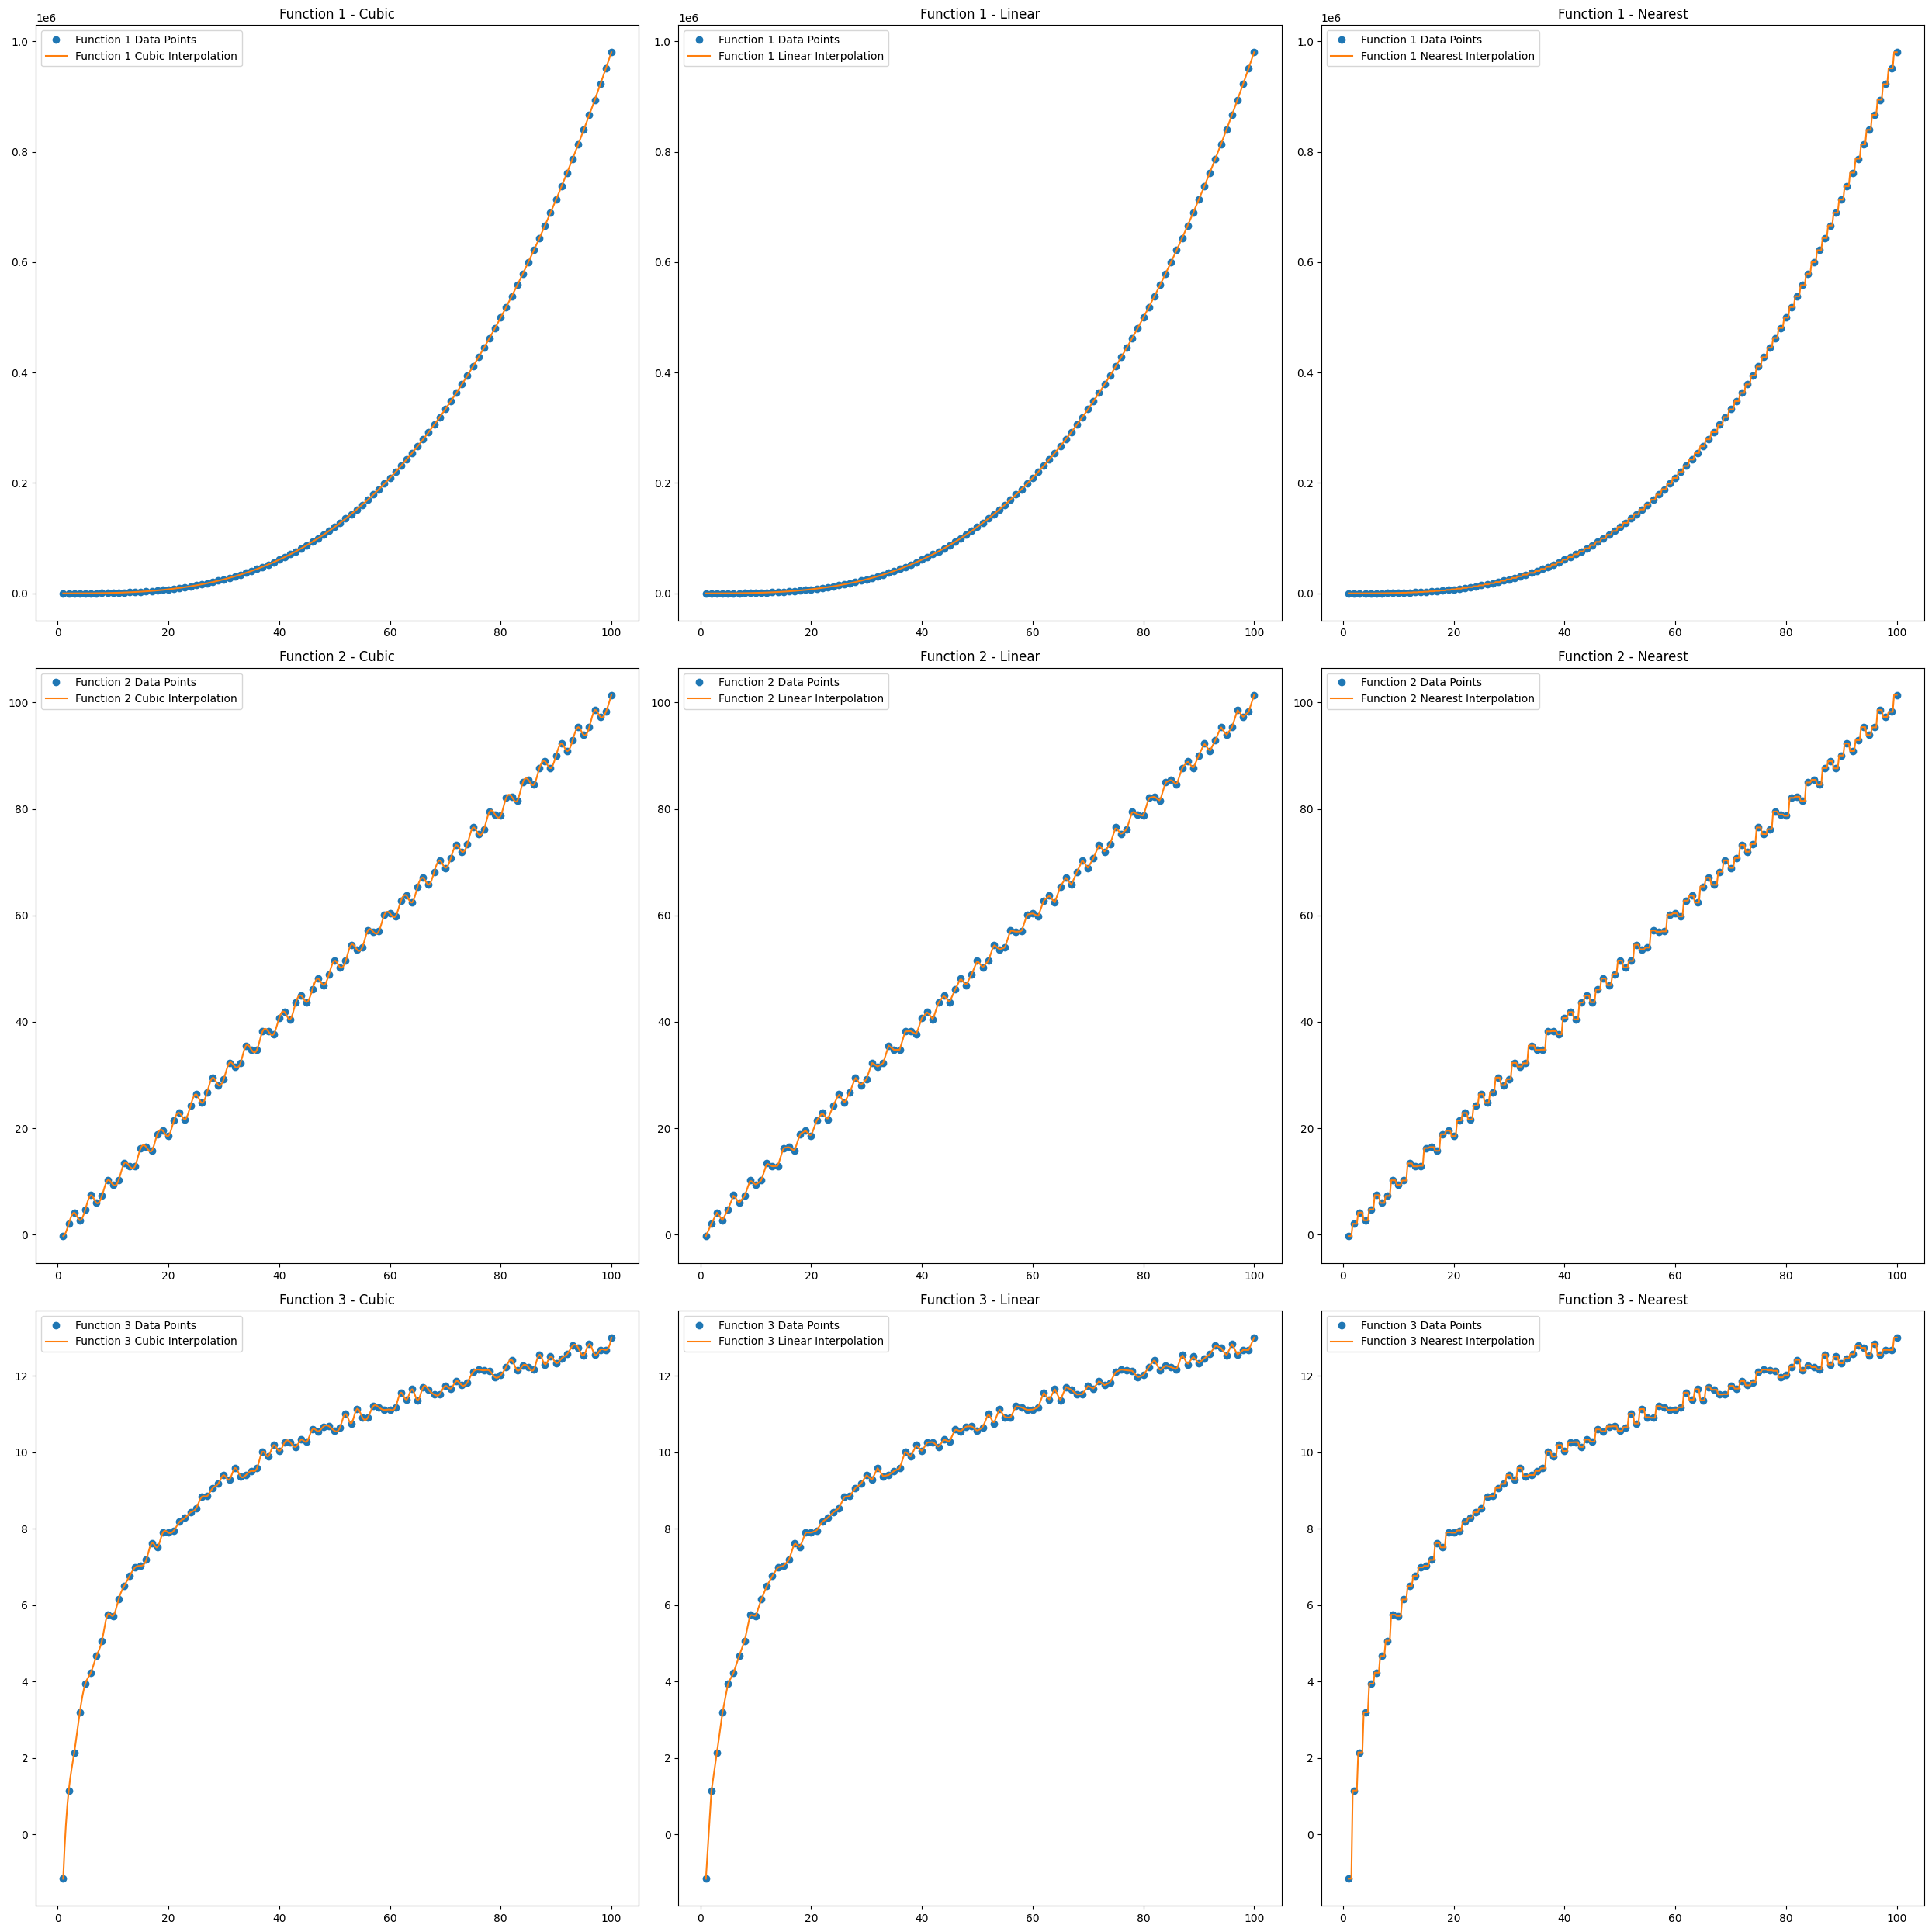

In [12]:
plt.figure(figsize=(25, 25))

functions = ['Cubic', 'Linear', 'Nearest']
interpolated_points = [cubic, linear, nearest]

for i in range(3):
    for j in range(3):
        plt.subplot(3, 3, 3*i + j + 1)
        plt.plot(x_points, point_list[i], 'o', label=f'Function {i+1} Data Points')
        plt.plot(x_new, interpolated_points[j][i], '-', label=f'Function {i+1} {functions[j]} Interpolation')
        plt.title(f'Function {i+1} - {functions[j]}')
        plt.legend()

plt.tight_layout()
plt.show()
